# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Распределение Стьюдента


В `scipy.stats` распределение Стьюдента задается объектом `t` с параметрами:
 * `loc` и `scale` параметры распределения так же как и у нормального распределение
 * `df` число степеней свободы

Все остальные методы стандартные. Например, генерации выборки из распределения $T_{50}$ будет выглядеть так:


In [11]:
sps.t(df=50).rvs(4)

array([-2.26352403,  0.11996148, -0.99932391,  1.46508344])

Постройте на одном графике плотности распределения Стьюдента и нормального.


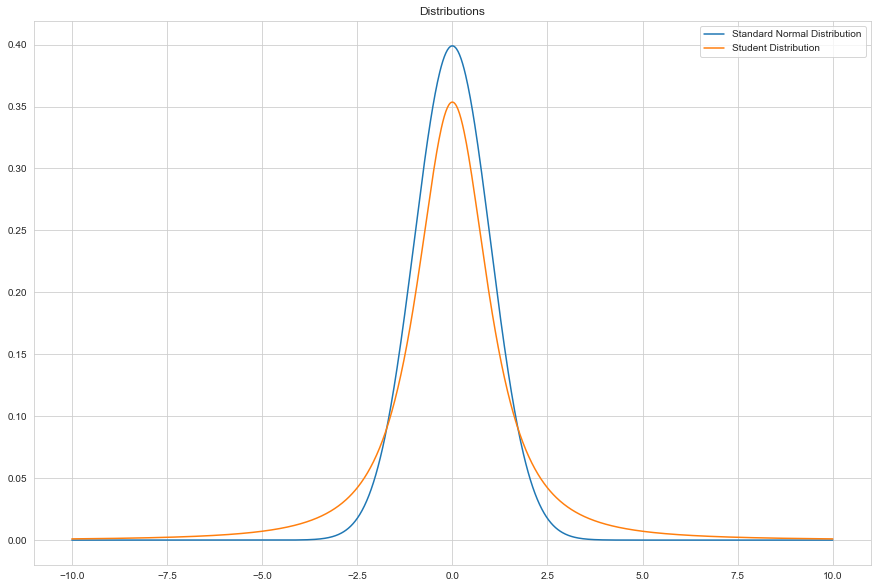

In [7]:
from scipy.stats import norm
plt.figure(figsize=(15, 10))

x = np.linspace(-10, 10, 1000)
plt.plot(x, norm.pdf(x), label="Standard Normal Distribution")
plt.plot(x, sps.t(df=2).pdf(x), label="Student Distribution")

plt.title("Distributions")
plt.legend()

plt.show()

Что вы можете сказать о скорости убывания "хвостов" данных распределений? Повлияет ли это на значения соответствующих квантилей?

**Ответ:** хвосты нормального распределения легкие, убывают быстрее. Это повлияет на значение квантилей т.к. изменяется площадь под хвостами.

### Квантили распределения Стьюдента

Для подсчета теоретических значений квантилей в модуле `scipy.stats` есть метод `.ppf`. На вход принимает параметр `alpha` - значение квантиля, а так же все параметры выбранного распределения.



In [14]:
sps.norm(loc=0, scale=1).ppf(0.05)

-1.6448536269514729

Для распределения Стьюдента нужно указать еще число степеней свобод.

In [425]:
sps.t(loc=0, scale=1, df=5).ppf(0.05)

-2.0150483726691575

Как мы видим, значения квантилей довольно сильно различаются. 

Возьмите `alpha` равное 95% и постройте график значений квантилей распределения стьюдента $T_{n-1,(1+\alpha)/2}$ от его степеней свобод. Так же нанесите на график значение квантиля нормального распределения $z_{(1+\alpha)/2}$

*Указание*: рассмотрите значения степеней свобод от 1 до 50.

In [12]:
alpha = 0.95
dfs = np.linspace(1, 50)  # массив степеней свобод

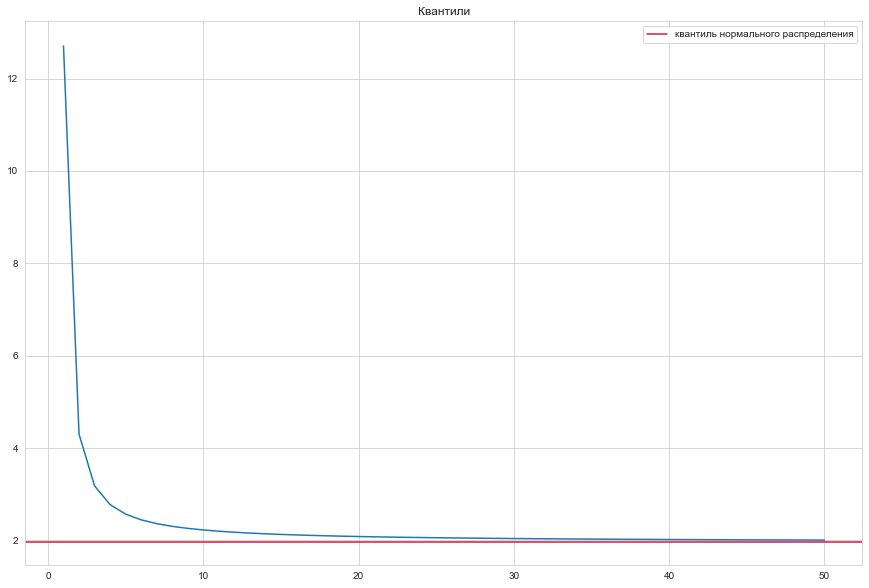

In [30]:
student = []
for i in dfs:
    student.append(sps.t(loc=0, scale=1, df=i).ppf((1+alpha)/2))
    
plt.figure(figsize=(15, 10))

x = np.linspace(-10, 10, 1000)
plt.plot(dfs, student)
plt.axhline(sps.norm(loc=0, scale=1).ppf((1+alpha)/2), color='crimson', label='квантиль нормального распределения')

plt.title("Квантили")
plt.legend()

plt.show()

Как изменяется поведение значения квантилей t распределения, есть ли у него какой-то предел?

**Ответ:** значение квантилей с ростом степеней свободы стремится к таковому у нормального распределения, как и само распределение Стьюдента стремится к нормальному

### ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимптотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.


Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: ($\overline{X} \pm \frac{z_{(1+\alpha)/2}}{\sqrt{n}}S$) 

Точный доверительный интервал:  ($\overline{X} \pm \frac{T_{n-1,(1+\alpha)/2}}{\sqrt{n-1}}S$)



Постройте доверительные интервалы для параметра сдвига стандартного нормального распределения. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

*Указание*: рассмотрите длину выборки около 20-30.


In [36]:
sample_size = 30
sample = sps.norm(loc=0, scale=1).rvs(size = sample_size)  # выборка

alpha = 0.95

norm = sps.norm(loc=0, scale=1).ppf((1+alpha)/2)
st = sps.t(loc=0, scale=1, df=sample_size-1).ppf((1+alpha)/2)

asymptotic_ci = (np.mean(sample) - norm * np.std(sample)/np.sqrt(sample_size), 
                 np.mean(sample) + norm * np.std(sample)/np.sqrt(sample_size))  # асимптотические ДИ

precise_ci = (np.mean(sample) - st * np.std(sample)/np.sqrt(sample_size-1),
              np.mean(sample) + st * np.std(sample)/np.sqrt(sample_size-1))   # точные ДИ
print('asymptotic_ci=', asymptotic_ci)
print('precise_ci=', precise_ci)

asymptotic_ci= (-0.5695988968075693, 0.1604298646741532)
precise_ci= (-0.5854783677826172, 0.1763093356492012)


Сравните полученные значения для доверительных интервалов.

**Ответ**: для стьюдента получаем больше интервал что согласуется с его более тяжелыми хвостами по сравнению с нормальным

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [37]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    norm = sps.norm(loc=0, scale=1).ppf((1+alpha)/2)
    cum_mean = np.cumsum(sample) / np.arange(1, len(sample)+1)
    std = np.cumsum(np.array(sample)**2) / np.arange(1, len(sample)+1) - cum_mean**2
    left = cum_mean - (norm * std**0.5) / np.sqrt(np.arange(1, len(sample)+1))
    right = cum_mean + (norm * std**0.5) / np.sqrt(np.arange(1, len(sample)+1))
    return left, right


def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''

    st = sps.t(loc=0, scale=1, df=sample_size-1).ppf((1+alpha)/2)
    cum_mean = np.cumsum(sample) / np.arange(1, len(sample)+1)
    lens = [i for i in range(1, len(sample)+1)]
    std = np.cumsum(np.array(sample)**2) / np.arange(1, len(sample)+1) - cum_mean**2
    left = cum_mean - st * std **0.5 / ((np.array(lens)-1)**1/2)
    right = cum_mean + st * std **0.5 / ((np.array(lens)-1)**1/2)
    return left, right

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассмотрите длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.


In [40]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''

    time = np.arange(len(left)) + 1

    assert len(time) == len(right)

    plt.fill_between(time, left, right)
    plt.plot(time, estimation)

    plt.legend(fontsize=16)
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость значений \
доверительного интервала от размера выборки')
    plt.grid()

C:\Users\cara_\AppData\Local\Temp\ipykernel_16132\845054879.py:32: RuntimeWarning: invalid value encountered in true_divide
  left = cum_mean - st * std **0.5 / ((np.array(lens)-1)**1/2)
C:\Users\cara_\AppData\Local\Temp\ipykernel_16132\845054879.py:33: RuntimeWarning: invalid value encountered in true_divide
  right = cum_mean + st * std **0.5 / ((np.array(lens)-1)**1/2)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


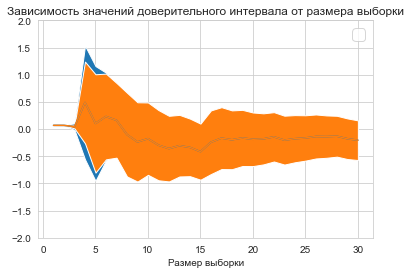

In [45]:
estimation = cum_mean = np.cumsum(sample) / np.arange(1, len(sample)+1)
left_as, right_as = calculate_asymptotic_confidence_intervals(sample)

left_pr, right_pr = calculate_confidence_intervals(sample)
draw_confidence_interval(
    left_pr, right_pr, estimation=estimation, sample=None,
    ylim=(-1.5, 1.5), color_estimation='#FF3300', color_interval='blue',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label='Точный доверительный интервал'
)

draw_confidence_interval(
    left_as, right_as, estimation=estimation, sample=None,
    ylim=(-2, 2), color_estimation='#FF3300', color_interval='lightgreen',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label='Асимптотический доверительный интервал'
)

**Вывод:** для точного доверительного интервала у нас больше уверенности, он шире

## Задача 2
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [16]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

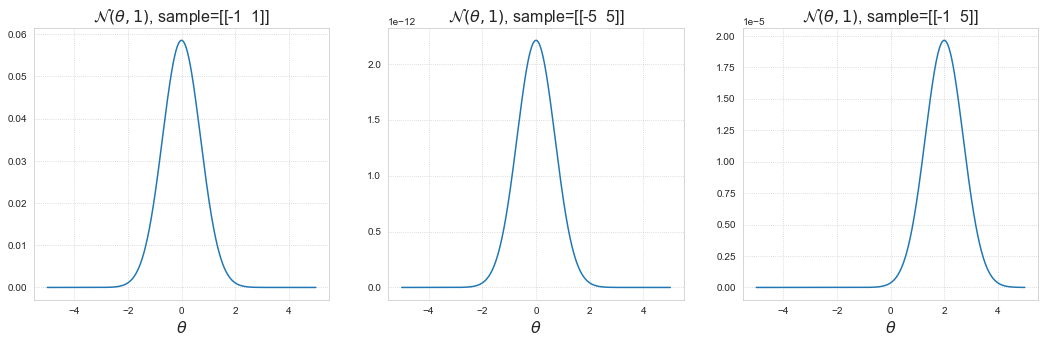

In [20]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

In [ ]:
# ваш код

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [22]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


In [ ]:
# ваш код